# Computational Epidemiology

## Modules

In [65]:
# Data Wrangling
import numpy as np

# Network Data Analysis 
import networkx as nx

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt 
#plt.style.use('seaborn-white')
import matplotlib.ticker as ticker
%pylab inline

# Geo-Spatial Data Analysis
#import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Other Utilities
from operator import itemgetter
from collections import defaultdict

Populating the interactive namespace from numpy and matplotlib


## Deterministic SIR 

* Continuous time 
* Deterministic

$$ \dot{S} = - \beta S I $$
$$ \dot{I} = \beta S I - \mu I $$
$$ \dot{R} = \mu I $$

In the asymptotic (initial time) regime 

$$i = \frac{I}{N} \sim 0$$
$$s = \frac{S}{N} \sim 1$$
$$ R_0 = \frac{\beta}{\mu}$$

* Single-run simulation
* Basic reproduction number $R_0 = 3.0$

### Parameters

In [26]:
mu = 0.2           # Recovery rate 
R0 = 3.0           # Basic reproduction number 
beta = R0 * mu    # Transmission rate

print("The average infectious period is ", 1./mu, " days")

The average infectious period is  5.0  days


### Initial Conditions

In [27]:
N = 10000     # Population size
I = 10        # Infected & infectious subpopulation
S = N-I       # Susceptible subpopulation 
R = 0         # Removed / Recovered subpopulation

### Single-Run Simulation

In [28]:
# Create time series list 
St = []
It = []
Rt = []

# Create list of differences
deltaSt = []
deltaIt = []

# Populate time series with initial conditions 
St.append(S)   
It.append(I)
Rt.append(R)

# Implement the dynamical model 
while I>0.01:
    i = float(I) * S/N
    deltaSI = beta * i
    
    deltaIR = mu * I
    
    S = S-deltaSI
    I = I + deltaSI-deltaIR
    R = R + deltaIR
    
    deltaSt.append(deltaSI)
    deltaIt.append(deltaIR)
    St.append(S)
    It.append(I)
    Rt.append(R)
    
#print("The final attack rate is ", Rt[-1]/N)

### Visualization

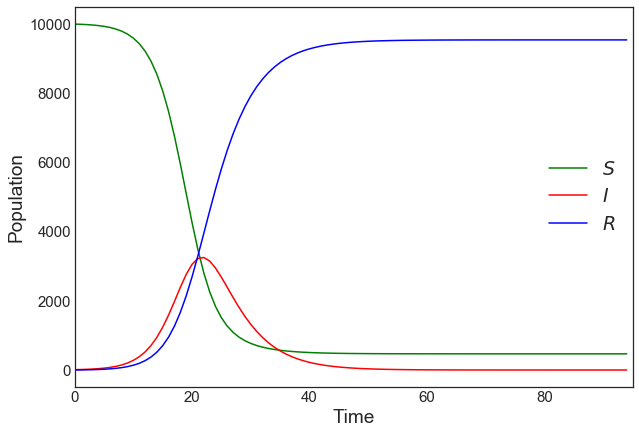

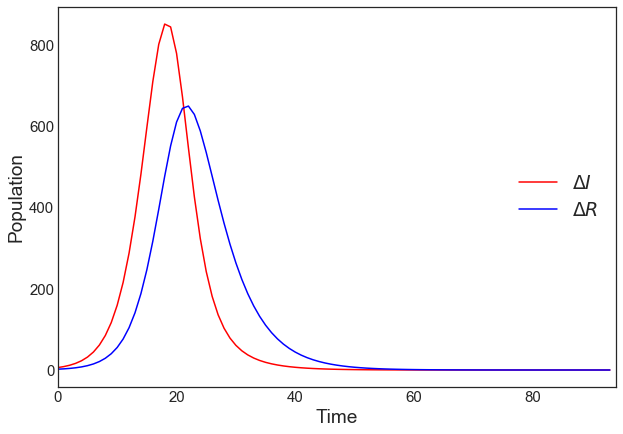

In [29]:
# Plot the S,I,R trajectories 
plt.figure(figsize = (10,7))

plt.plot(range(0, len(St)),np.array(St), label = '$S$', color = 'g')
plt.plot(range(0, len(It)),np.array(It), label = '$I$', color = 'r')
plt.plot(range(0, len(Rt)),np.array(Rt), label = '$R$', color = 'b')

#plt.yscale('log')
plt.xlim([0,len(It)])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Time', fontsize = 19)
plt.ylabel('Population', fontsize = 19)
plt.legend(loc = 'right', fontsize = 19)

# Plot the dS,dI,dR trajectories 

plt.figure(figsize = (10,7))

plt.plot(range(0, len(deltaSt)),np.array(deltaSt), label = '$\Delta I$', color = 'r')
plt.plot(range(0, len(deltaIt)),np.array(deltaIt), label = '$\Delta R$', color = 'b')
#plt.plot(range(0, len(Rt)),np.array(Rt), label = 'R', color = 'b')

#plt.yscale('log')
plt.xlim([0,len(deltaIt)])

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Time', fontsize = 19)
plt.ylabel('Population', fontsize = 19)
plt.legend(loc = 'right', fontsize = 19)

## Stochastic SIR

* Discrete time 
* Stochastic $\sim B(X,p)$
* Multi-run simulation
* Extract their statistical averages.
* Basic reproduction number $R_0 = 3.0$

### Parameters

In [30]:
mu = 0.2           # Recovery rate 
R0 = 3.0           # Basic reproduction number 
beta = R0 * mu     # Transmission rate

#print("The average infectious period is ", 1./mu, " days")

### Multi-Run Simulation

In [31]:
I_dict = defaultdict(list)   # Define the time series dictionary for I 
R_final = []                 # Define the multi-run list for final R
nrun = 1000                  # Set the number of runs  
Irun = []                    # Define the multi-run list of lists for I 

for run in range(0,nrun):
    
    # Set initial conditions at each run 
    N = 10000         # Population size
    I = 10            # Infected & infectious subpopulation
    S = N - I         # Susceptible subpopulation 
    R = 0             # Removed / Recovered subpopulation
    t = 0             # Initialize the clock
    
    I_list = []         # Define the single-run list for I 
    I_list.append(I)    # Initialize the single-run list for I
    I_dict[t].append(I) # Initialize the time series dictionary for I
    
    # Implement the dynamical model 
    while I>0:
        
        i = float(I)/N
        p = beta * i
        
        deltaSI = np.random.binomial(S,p)
        deltaIR = np.random.binomial(I,mu)
        
        S = S - deltaSI
        I = I + deltaSI - deltaIR
        R = R + deltaIR
        
        t += 1
        r = float(R)/N
        
        I_list.append(I)
        I_dict[t].append(I)
    
    R_final.append(r)
    Irun.append(I_list)

#print("The average final attack rate is ", np.average(np.array(R_final)))

### Visualization

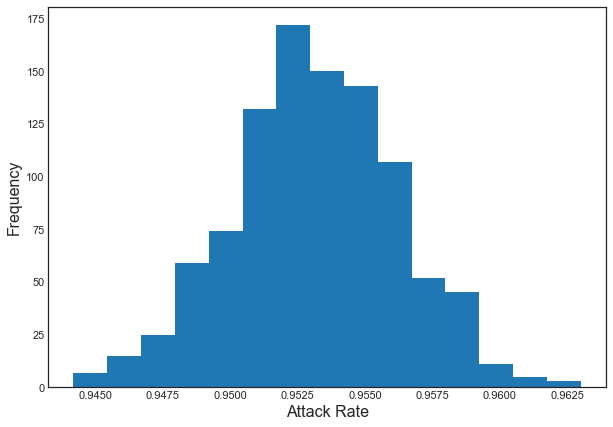

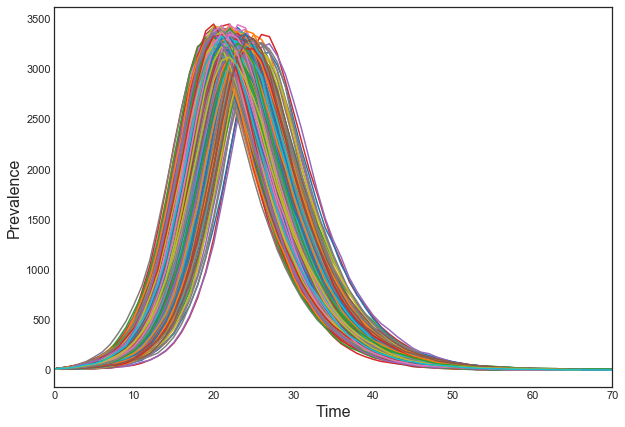

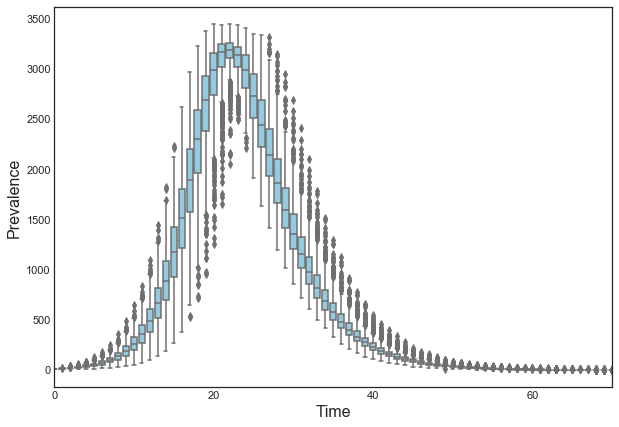

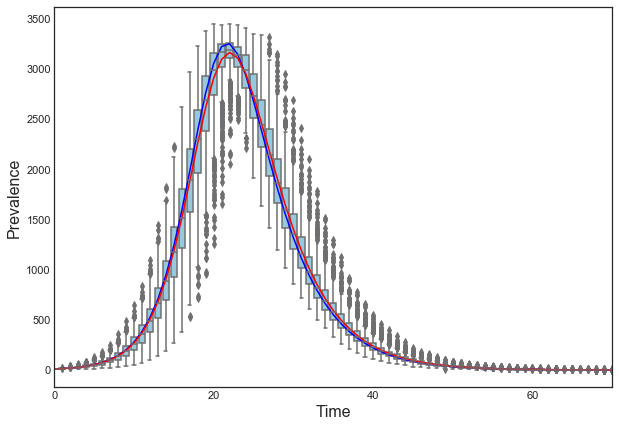

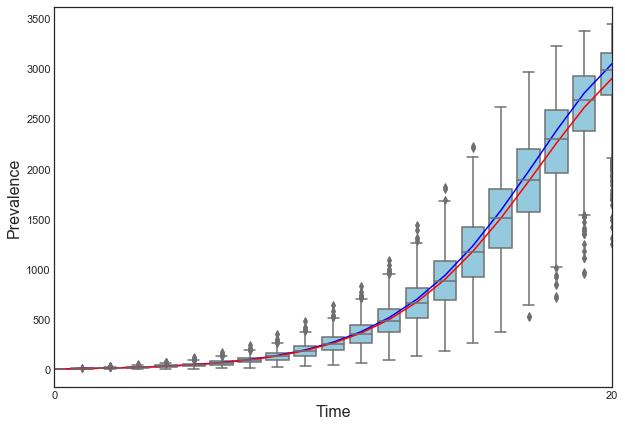

In [32]:
# 1. Plot the distribution of final attack rates
plt.figure(figsize = (10,7))
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.xlabel('Attack Rate', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)

a = plt.hist(R_final, bins = 15)

# 2. Plot the ensemble of trajectories
plt.figure(figsize = (10,7))
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Prevalence', fontsize = 16)
plt.xlim([0, 70])

for run in Irun: 
    plt.plot(range(0,len(run)),run)
    
    
# 3. Make a box plot for prevalence
full_array = [np.array(I_dict[t]) for t in I_dict]

plt.figure(figsize = (10,7))
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Prevalence', fontsize = 16)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

ax = sns.boxplot(data = full_array, color = 'skyblue')
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.xlim([0, 70])

# Compare the deterministic simulation vs. the average prevalence of the stochastic version
full_average = [np.average(np.array(I_dict[t])) for t in I_dict]

### 4. Make a box plot for prevalence: deterministic vs. averaged stochastic
plt.figure(figsize = (10,7))
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Prevalence', fontsize = 16)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

ax = sns.boxplot(data = full_array, color = 'skyblue')

plt.plot(range(0,len(It)),It,color = 'b') 
plt.plot(range(0,len(full_average)),full_average,color = 'r')

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.xlim([0,70])
plt.show()

### 5. Let's zoom in
plt.figure(figsize = (10,7))
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Prevalence', fontsize = 16)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

ax = sns.boxplot(data = full_array, color = 'skyblue')

plt.plot(range(0,len(It)),It,color = 'b') 
plt.plot(range(0,len(full_average)),full_average,color = 'r')

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.xlim([0,20])
plt.show()

## Dependence on Initial Conditions

In [33]:
# Let's change the initial number of infected individuals to 1.

# Model parameters
## mu = 0.2
## R0 = 3.0
## beta = R0 * mu

I_dict = defaultdict(list)   # Define the time series dictionary for I 
R_final = []                 # Define the multi-run list for final R
nrun = 1000                  # Set the number of runs  
Irun = []                    # Define the multi-run list of lists for I 

for run in range(0,nrun):
    
    # Set initial conditions at each run 
    N = 10000         # Population size
    I = 1             # Infected & infectious subpopulation
    S = N - I         # Susceptible subpopulation 
    R = 0             # Removed / Recovered subpopulation
    t = 0             # Initialize the clock
    
    I_list = []         # Define the single-run list for I 
    I_list.append(I)    # Initialize the single-run list for I
    I_dict[t].append(I) # Initialize the time series dictionary for I
    
    # Implement the dynamical model 
    while I>0:
        
        i = float(I)/N
        p = beta * i
        
        deltaSI = np.random.binomial(S,p)
        deltaIR = np.random.binomial(I,mu)
        
        S = S - deltaSI
        I = I + deltaSI - deltaIR
        R = R + deltaIR
        
        t += 1
        r = float(R)/N
        
        I_list.append(I)
        I_dict[t].append(I)
    
    R_final.append(r)
    Irun.append(I_list)

#print("The average final attack rate is ", np.average(np.array(R_final)))

### Visualization

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 <a list of 9 Text yticklabel objects>)

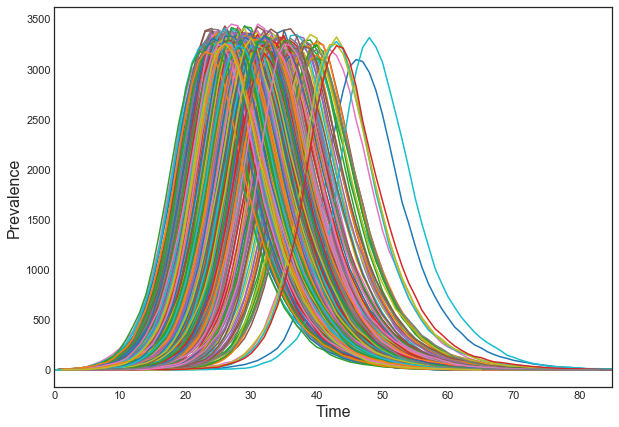

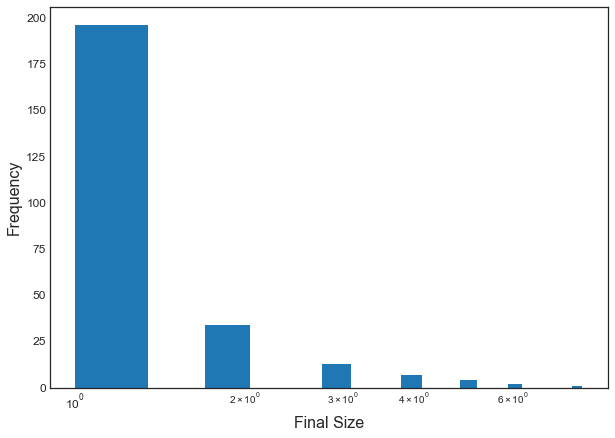

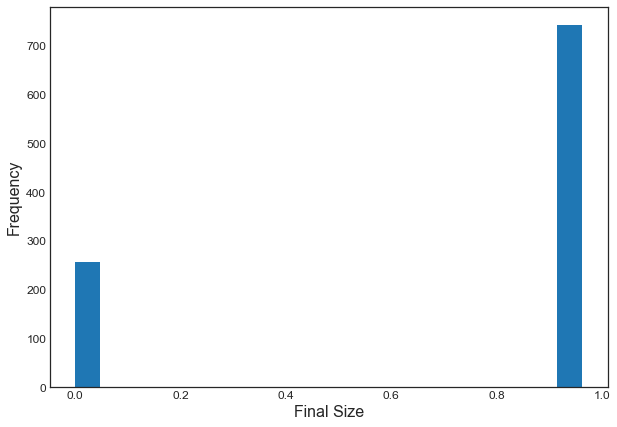

In [50]:
# Plot the ensemble of trajectories
plt.figure(figsize = (10,7))
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Prevalence', fontsize = 16)
plt.xlim([0, 85])

for run in Irun: 
    plt.plot(range(0,len(run)),run)
    
# With I_0 = 1 we see larger fluctuations: we have several runs without outbreak! 
## The initial seed individual recovers before infecting someone else.

# Plot the distribution of runs with no outbreak
no_outbreak = []
for r in R_final:
    if r<0.8:
        no_outbreak.append(r * 10000)
#print(no_outbreak)

plt.figure(figsize = (10,7))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Final Size', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
b = plt.hist(no_outbreak, bins = 20)
plt.xscale('log')


plt.figure(figsize = (10,7))
plt.hist(R_final, bins = 20)
plt.xlabel('Final Size', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

In a stochastic SIR model, the probability of an outbreak is equal to 
<center>
$p_{outb} = 1 - (\frac{1}{R_0})^{I_0}$
</center>

In [38]:
p_outbreak = 1-1/R0
p_outbreak

Of course, such fluctuations do not affect the deterministic model, where the outcome is fixed. 

In [55]:
# Single-run deterministic simulation 

# Initial conditions 
N = 10000         # Population size
I = 1             # Infected & infectious subpopulation
S = N - I         # Susceptible subpopulation 
R = 0             # Removed / Recovered subpopulation
    
# Create time series list 
St = []
It = []
Rt = []

# Create list of differences
deltaSt = []
deltaIt = []

# Populate time series with initial conditions 
St.append(S)   
It.append(I)
Rt.append(R)

# Implement the dynamical model 
while I>0.01:
    i = float(I) * S/N
    deltaSI = beta * i
    
    deltaIR = mu * I
    
    S = S-deltaSI
    I = I + deltaSI-deltaIR
    R = R + deltaIR
    
    deltaSt.append(deltaSI)
    deltaIt.append(deltaIR)
    St.append(S)
    It.append(I)
    Rt.append(R)
    
print("The final attack rate is ", Rt[-1]/N)

The final attack rate is  0.9532189896643453


## Stochastic SIR on Static Network (US Airport)

In [42]:
# Import datasets
airport_path = './../network_data/USairport_2010.txt'
meta_path = './../network_data/USairport_2010_codes.txt'

In [43]:
G = nx.Graph()
fh = open(airport_path,'r')
for line in fh.readlines():
    s = line.strip().split()
    G.add_edge(int(s[0]),int(s[1]))
fh.close()  

FileNotFoundError: [Errno 2] No such file or directory: './../network_data/USairport_2010.txt'

In [ ]:
G.code = {}
G.name = {}
G.pos = {}

lons = []
lats = []

finfo = open(meta_path,'r')
finfo.readline()
for line in finfo.readlines():
    s = line.strip().split()
    node = int(s[0])
    
    lon = float(s[4])
    lat = float(s[3])
    
    G.code[node] = s[1]
    G.name[node] = s[2]
    G.pos[node] = [lon,lat]
    
    lons.append(lon)
    lats.append(lat)
finfo.close() 

In [ ]:
#disease parameters
mu = 0.2#infectious period
lambd = 0.01#probability of infection given a contact

In [ ]:
#we need to store the disease status of each node
G.disease_status = {} #S = 0, I = 1, R = -1

infected_nodes = []#list of infected nodes

In [ ]:
#let's choose a seed
node_list = []

deg = dict(G.degree())
for i in sorted(deg.items(), key = itemgetter(1)):
    node_list.append(i[0])
seed = node_list[-1]

print("The seed is", G.name[seed])
print("The degree of the seed is", G.degree(seed))

In [ ]:
#initialize the network
infected_nodes.append(seed)

for n in G.nodes():
    if n in infected_nodes:
        G.disease_status[n] = 1
        #infected
    else:
        G.disease_status[n] = 0
        #susceptible

In [ ]:
I_net = []

while len(infected_nodes)>0:
    
    #transmission
    for i in infected_nodes:
        for j in G.neighbors(i):
            if G.disease_status[j] =  = 0:
                p = np.random.random()
                if p<lambd:
                    G.disease_status[j] = 1
                
    
    #recovery
    for k in infected_nodes:
        p = np.random.random()
        if p<mu:
            G.disease_status[k] = -1
    
    #update of disease status
    infected_nodes = []
    for n in G.nodes():
        if G.disease_status[n] =  = 1:
            infected_nodes.append(n)
 
    #store output
    I_net.append(len(infected_nodes))

In [ ]:
plt.figure(figsize = (10,7))

plt.xlabel('time', fontsize = 18)
plt.ylabel('prevalence', fontsize = 18)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.plot(range(0,len(I_net)),I_net)

In [ ]:
recovered = 0
for n in G.nodes():
    if G.disease_status[n] =  = -1:
        recovered +  = 1

print("The total number of infected nodes is", recovered)
print("The final attack rate is", recovered/len(G.nodes()))
        

## Visualize the infection spread on the network

In [ ]:
shape_path = './../shapefiles/USA_shape.shp'

In [ ]:
ls ./../shapefiles/

In [ ]:
#we need to store the disease status of each node
G.disease_status = {} #S = 0, I = 1, R = -1

infected_nodes = []#list of infected nodes

In [ ]:
#initialize the network
infected_nodes.append(seed)

for n in G.nodes():
    if n in infected_nodes:
        G.disease_status[n] = 1
        #infected
    else:
        G.disease_status[n] = 0
        #susceptible

In [ ]:
t = 0
node_color = [G.disease_status[v] for v in G]#color code on disease status

## Import the shapefile of the USA

In [ ]:
usa = gpd.read_file(shape_path)

In [ ]:
usa.plot(figsize = (12,7))

In [ ]:
usa.head()

In [ ]:
usa_cont = usa[(usa.NAME ! =  'Alaska') & (usa.NAME ! = 'Hawaii') & (usa.NAME ! =  'Puerto Rico')]

In [ ]:
usa_cont.head()

In [ ]:
usa_cont.plot(figsize = (12,7))

In [ ]:
usa_cont.crs

In [ ]:
usa_cont_alb = usa_cont.to_crs({'init': 'esri:102003'})

In [ ]:
usa_cont_alb.head()

In [ ]:
ax = usa_cont_alb.plot(figsize = (12,7), alpha = 0.8)

In [ ]:
from pyproj import Proj, transform

In [ ]:
df = pd.read_csv(meta_path, sep = ' ')

In [ ]:
df

In [ ]:
geo = [Point(xy) for xy in zip(df.lon, df.lat)]
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geo)

In [ ]:
geo_df.crs

In [ ]:
geo_df.plot()

In [ ]:
original = Proj(geo_df.crs) # EPSG:4326 in your case
destination = Proj(init = 'esri:102003') # your new proj

In [ ]:
G.pos_new = {}
for node in G:
    
    long,lat = G.pos[node]
    x,y = transform(original,destination,long,lat)
    
    G.pos_new[node] = (x,y)

In [ ]:
ax = usa_cont_alb.plot(figsize = (12,7), alpha = 0.7)
nx.draw_networkx_nodes(G, pos = G.pos_new, node_size = 30,node_color = node_color, cmap = plt.cm.RdBu_r, vmin = -1, vmax = 1)

In [ ]:
while len(infected_nodes)>0 and t<15:
    
    for i in infected_nodes:
        for j in G.neighbors(i):
            if G.disease_status[j] == 0:
                p = np.random.random()
                if p<lambd:
                    G.disease_status[j] = 1
                
    for k in infected_nodes:
        p = np.random.random()
        if p<mu:
            G.disease_status[k] = -1
    
    infected_nodes = []
    for n in G.nodes():
        if G.disease_status[n] == 1:
            infected_nodes.append(n)

    t +  = 1
    node_color = [G.disease_status[v] for v in G]#color code on disease status
    
    plt.figure(figsize = (12,7))
    ax = usa_cont_alb.plot(figsize = (12,7), alpha = 0.7)
    nx.draw_networkx_nodes(G, pos = G.pos_new, node_size = 30,node_color = node_color, cmap = plt.cm.RdBu_r, vmin = -1, vmax = 1)
    
    #plt.savefig('./spreading_SIR_snapshot_time_' + str(t) + '.png')

## Deterministic SLIR with Demography

* Continuous time 
* Deterministic

$$ \dot{S} = \mu - \beta S I - \mu S$$
$$ \dot{L} = \beta S I - (\epsilon + \mu) L $$
$$ \dot{I} = \epsilon L - (\mu +\gamma) I $$
$$ \dot{R} = -\mu R +\gamma I $$

* Single-run simulation

### Parameters

In [66]:
mu = 0.5             # Demographic rate (birth inflow = death outflow)
beta = 0.4           # Infection-induced transmission rate 
epsilon = 0.6        # Spontaneous transition rate 
gamma = 0.6          # Recovery rate

### Initial Conditions

In [67]:
N = 100000     # Population size
L = 5         # Latent / Exposed subpopulation (Infected, not yet infectious)
I = 10000       # Infected & infectious subpopulation
S = N-I-L       # Susceptible subpopulation 
R = 0         # Removed / Recovered subpopulation

### Single-Run Simulation

In [74]:
# Create time series list 
St = []
Lt = []
It = []
Rt = []

# Create list of differences
deltaSt = []
deltaLt = []
deltaIt = []
deltaRt = []

# Populate time series with initial conditions 
St.append(S)
Lt.append(L)
It.append(I)
Rt.append(R)

# Implement the dynamical model 
while I>0.0001:
    i = float(I) / N
    s = float(S) / N
    
    S = S + mu - mu*S - beta*S*i
    L = L + beta*s*I - (epsilon+mu)*L
    I = I + epsilon*L - (mu+gamma)*I
    R = R + gamma*I - mu*R
    
    deltaS = mu - mu*S - beta*S*i
    deltaL = beta*S*i - (epsilon+mu)*L
    deltaI = epsilon*L - (mu+gamma)*I
    deltaR =  gamma*I - mu*R
    
    deltaSt.append(deltaS)
    deltaLt.append(deltaL)
    deltaIt.append(deltaI)
    deltaRt.append(deltaR)
    
    St.append(S)
    Lt.append(L)
    It.append(I)
    Rt.append(R)
    
#print("The final attack rate is ", Rt[-1]/N)

### Visualization

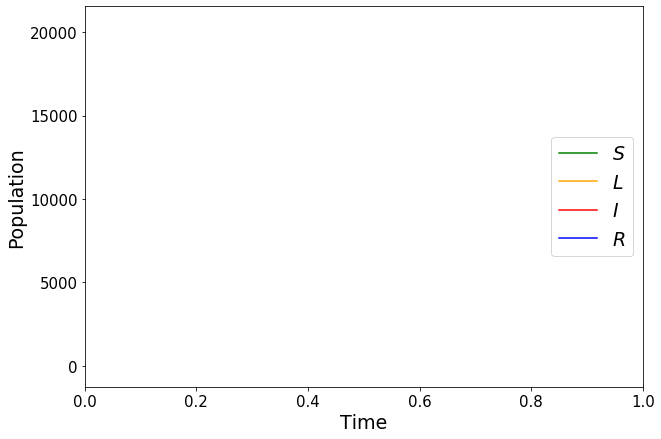

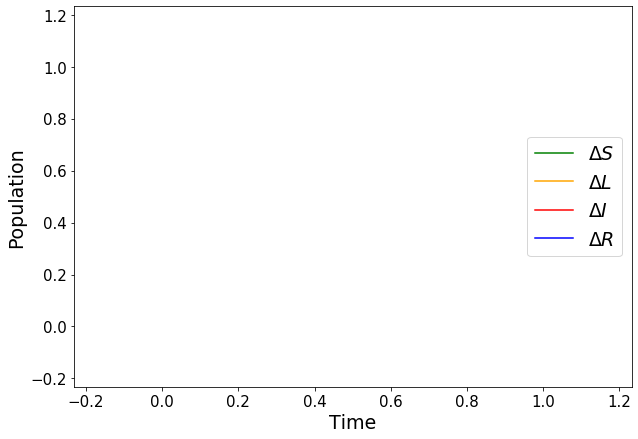

In [76]:
# Plot the S,I,R trajectories 
plt.figure(figsize = (10,7))

plt.plot(range(0, len(St)),np.array(St), label = '$S$', color = 'Green')
plt.plot(range(0, len(Lt)),np.array(Lt), label = '$L$', color = 'Orange')
plt.plot(range(0, len(It)),np.array(It), label = '$I$', color = 'Red')
plt.plot(range(0, len(Rt)),np.array(Rt), label = '$R$', color = 'Blue')

#plt.yscale('log')
plt.xlim([0,len(It)])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Time', fontsize = 19)
plt.ylabel('Population', fontsize = 19)
plt.legend(loc = 'right', fontsize = 19)

# Plot the dS,dI,dR trajectories 

plt.figure(figsize = (10,7))

plt.plot(range(0, len(deltaSt)),np.array(deltaSt), label = '$\Delta S$', color = 'Green')
plt.plot(range(0, len(deltaLt)),np.array(deltaLt), label = '$\Delta L$', color = 'Orange')
plt.plot(range(0, len(deltaIt)),np.array(deltaIt), label = '$\Delta I$', color = 'Red')
plt.plot(range(0, len(deltaRt)),np.array(deltaRt), label = '$\Delta R$', color = 'Blue')
#plt.plot(range(0, len(Rt)),np.array(Rt), label = 'R', color = 'b')

#plt.yscale('log')
#plt.xlim([0,len(deltaIt)])

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Time', fontsize = 19)
plt.ylabel('Population', fontsize = 19)
plt.legend(loc = 'right', fontsize = 19)